In [323]:
'''
returns average bead volume in Angstrom^3.
Arguments:
df: pandas data frame containing info from MD simulation
temperature: temperature of MD simulation
'''
def getBeadVolDensityAndMass(df,temperature,i,j):
    frac_A = 10000/50000
    frac_B = 20000/50000
    frac_C = (10*2000)/50000
    df_at_kT = df[df['kT'] == temperature]
    M_A = df_at_kT['mol_weight'][0]#g/mol
    M_B = df_at_kT['mol_weight'][1]
    toughner_name = j
    if toughner_name is 'PES10':
        M_C = df_at_kT['mol_weight'][3]
        rho_C = df_at_kT['rho'][3]
    else:
        M_C = df_at_kT['mol_weight'][2]
        rho_C = df_at_kT['rho'][2]
        
    av_M = M_A*frac_A + M_B*frac_B + M_C*frac_C
    #print('av_M',av_M,'g/mol')

    rho_A = df_at_kT['rho'][0] #g/cm^3
    rho_B = df_at_kT['rho'][1] 
    

    av_rho = (rho_A*frac_A) + (rho_B*frac_B) + (rho_C*frac_C)
    #print('av_rho',av_rho,'g/cm^3')
    cm_cubed_toA_cubed = 1e24
    av_vol = cm_cubed_toA_cubed*av_M/av_rho/Na #A^3
    
    #print('av_vol',av_vol,'A^3 @',temperature)
    return av_vol,av_rho,av_M

def getBeadVolDensityAndMass_analytical(density_eqs,i,j,T):
    frac_A = 10000/50000
    frac_B = 20000/50000
    frac_C = (10*2000)/50000
    
    M_A = 248.306
    M_B = 340.423
    toughner_name = j
    if toughner_name is 'PES10':
        M_C = 232.4614 #g/mol
        frac_C = (10*2000)/50000
    else:#if toughner_name is 'PES1':
        M_C = 234.276 #g/mol
        frac_C = (10*2000)/50000
 
    rho_A = (density_eqs['DDS'][0]*T) + density_eqs['DDS'][1]
    rho_B = (density_eqs['DGEBA'][0]*T) + density_eqs['DGEBA'][1]
    rho_C = (density_eqs[toughner_name][0]*T) + density_eqs[toughner_name][1]
    
    av_M = M_A*frac_A + M_B*frac_B + M_C*frac_C
    #print('av_M',av_M,'g/mol')

    av_rho = (rho_A*frac_A) + (rho_B*frac_B) + (rho_C*frac_C)
    #print('av_rho',av_rho,'g/cm^3')
    cm_cubed_toA_cubed = 1e24
    av_vol = cm_cubed_toA_cubed*av_M/av_rho/Na #A^3
    
    #print('av_vol',av_vol,'A^3')
    return av_vol,av_rho,av_M

def aij(T,i,j):
    kai_ij=kai_analytical(solubility_eqs,density_eqs,i,j,T)
    delta_a = kai_ij/0.286
    return 25.0+delta_a

def kai_analytical(solubility_eqs,density_eqs,i,j,T):
    
    kB = 1.381e-23 #JK^-1
    cm_cubed_toA_cubed = 1e24
    Vbead,dummy,dummy = getBeadVolDensityAndMass_analytical(density_eqs,i,j,T)
    Vbead_SI=Vbead*1e-30
    
    #print(Vbead_SI)
    #print(i,j)
    delta_i_SI = (solubility_eqs[i][0]*T) + solubility_eqs[i][1]
    delta_j_SI = (solubility_eqs[j][0]*T) + solubility_eqs[j][1]
    #print(delta_i,delta_j)
    kai_val = Vbead_SI/(kB*T) * (delta_i_SI-delta_j_SI)**2
    #toughner_name = j
    #if toughner_name is 'PES10':
    #    kai = kai/10
    #elif toughner_name is 'PES1':
    #    kai = kai*10
    return kai_val

def kai(df,i,j,T):
    kB = 1.381e-23 #JK^-1
    Vbead_SI,dummy,dummy = getBeadVolDensityAndMass(df,T,i,j)
    Vbead_SI*=1e-30
    df_at_kT = df[df['kT'] == T]
    #print(T)
    delta_i = df_at_kT['solubility_SI'][i]
    delta_j = df_at_kT['solubility_SI'][j]
    #print(delta_i,delta_j)
    return Vbead_SI/(kB*T) * (delta_i-delta_j)**2

'''
delta_i and j in (cal/cm^3)^(1/2)
Vbead in Angstroms
T in Kelvin
'''
def kai_exp(delta_i,delta_j,Vbead,T):
    joule_to_cal = 0.239
    kB = 1.381e-23*joule_to_cal #JK^-1
    Vbead_cm=Vbead*1e-24
    delta_deltas = delta_i-delta_j
    return Vbead_cm/(kB*T) * (delta_deltas)**2

def get_this_for_that(thisdf,thisKey,thatKey,thatValue):
    thisValue = thisdf.loc[thisdf[thatKey] == thatValue, thisKey].iloc[0]
    return thisValue

In [324]:
A = 10.29
B=7.98
C=7.33
V=409.42
T = 423
kai_ij = kai_exp(A,B,V,T)
delta_a = kai_ij/0.286
a_AB = 25.0 + delta_a

kai_ij = kai_exp(A,C,V,T)
delta_a = kai_ij/0.286
a_AC = 25.0 + delta_a

kai_ij = kai_exp(B,C,V,T)
delta_a = kai_ij/0.286
a_BC = 25.0 + delta_a
print(a_AB,a_AC,a_BC)

30.471356757725733 33.983684595208075 25.433209315818505


In [325]:
A = 11.085
B=8.60
C=9.26
V = 407.19
kai_ij = kai_exp(A,B,V,423)
delta_a = kai_ij/0.286
a_AB = 25.0 + delta_a

kai_ij = kai_exp(A,C,V,423)
delta_a = kai_ij/0.286
a_AC = 25.0 + delta_a

kai_ij = kai_exp(B,C,V,423)
delta_a = kai_ij/0.286
a_BC = 25.0 + delta_a
print(a_AB,a_AC,a_BC)


31.297264135181805 28.396447151357222 25.44420863325388


In [326]:
M = (248.3*0.2)+(340.42*0.4)+(232.46*0.4)
M

278.812

In [295]:
import pandas as pd
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rc('xtick', labelsize=50) 
matplotlib.rc('ytick', labelsize=50) 
matplotlib.rc('axes', labelsize=20)
matplotlib.rc('lines', linewidth=2)
#constants
Na = 6.022e23
cal_cm_cubed_to_MPa = 4.187
kB = 1.381e-23 #JK^-1
J_to_cal = 0.239
cal_cm_cube_to_SI = 4.187e6 #to J/m^3
MPa_to_SI = 1e6 #to J/m^3

In [296]:
#data
molecule_dict = {}
molecule_dict['DEBGF(273 K)'] = {'kT':273,'E_coh':31.23,'V':248901.03,'rho':1.14,'nmol':500,'mol_weight':340.423,'name':'DGEBA'}
molecule_dict['DEBGF(305 K)'] = {'kT':305,'E_coh':30.36,'V':252419.69,'rho':1.12,'nmol':500,'mol_weight':340.423,'name':'DGEBA'}
molecule_dict['DEBGF(340 K)'] = {'kT':340,'E_coh':29.01,'V':257982.95,'rho':1.10,'nmol':500,'mol_weight':340.423,'name':'DGEBA'}
molecule_dict['DEBGF(375 K)'] = {'kT':375,'E_coh':27.40,'V':264520.55,'rho':1.07,'nmol':500,'mol_weight':340.423,'name':'DGEBA'}
molecule_dict['DEBGF(405 K)'] = {'kT':405,'E_coh':26.12,'V':270604.60,'rho':1.04,'nmol':500,'mol_weight':340.423,'name':'DGEBA'}
molecule_dict['DEBGF(440 K)'] = {'kT':440,'E_coh':24.75,'V':277803.22,'rho':1.02,'nmol':500,'mol_weight':340.423,'name':'DGEBA'}
molecule_dict['DEBGF(475 K)'] = {'kT':475,'E_coh':23.30,'V':286160.71,'rho':0.99,'nmol':500,'mol_weight':340.423,'name':'DGEBA'}
molecule_dict['DEBGF(505 K)'] = {'kT':505,'E_coh':22.10,'V':294236.49,'rho':0.96,'nmol':500,'mol_weight':340.423,'name':'DGEBA'}
molecule_dict['DEBGF(540 K)'] = {'kT':540,'E_coh':20.79,'V':303874.10,'rho':0.93,'nmol':500,'mol_weight':340.423,'name':'DGEBA'}
molecule_dict['DEBGF(575 K)'] = {'kT':575,'E_coh':19.52,'V':314288.43,'rho':0.90,'nmol':500,'mol_weight':340.423,'name':'DGEBA'}
molecule_dict['DEBGF(600 K)'] = {'kT':600,'E_coh':18.75,'V':321468.57,'rho':0.88,'nmol':500,'mol_weight':340.423,'name':'DGEBA'}

molecule_dict['DDS(273 K)'] = {'kT':273,'E_coh':28.55,'V':156680.56,'rho':1.32,'nmol':500,'mol_weight':248.306,'name':'DDS'}
molecule_dict['DDS(305 K)'] = {'kT':305,'E_coh':27.98,'V':157994.45,'rho':1.30,'nmol':500,'mol_weight':248.306,'name':'DDS'}
molecule_dict['DDS(340 K)'] = {'kT':340,'E_coh':27.32,'V':159528.91,'rho':1.29,'nmol':500,'mol_weight':248.306,'name':'DDS'}
molecule_dict['DDS(375 K)'] = {'kT':375,'E_coh':26.61,'V':161309.42,'rho':1.28,'nmol':500,'mol_weight':248.306,'name':'DDS'}
molecule_dict['DDS(405 K)'] = {'kT':405,'E_coh':25.71,'V':163829.46,'rho':1.26,'nmol':500,'mol_weight':248.306,'name':'DDS'}
molecule_dict['DDS(440 K)'] = {'kT':440,'E_coh':24.68,'V':166750.55,'rho':1.24,'nmol':500,'mol_weight':248.306,'name':'DDS'}
molecule_dict['DDS(475 K)'] = {'kT':475,'E_coh':23.39,'V':171126.79,'rho':1.20,'nmol':500,'mol_weight':248.306,'name':'DDS'}
molecule_dict['DDS(505 K)'] = {'kT':505,'E_coh':22.50,'V':174465.55,'rho':1.18,'nmol':500,'mol_weight':248.306,'name':'DDS'}
molecule_dict['DDS(540 K)'] = {'kT':540,'E_coh':21.42,'V':178998.43,'rho':1.15,'nmol':500,'mol_weight':248.306,'name':'DDS'}
molecule_dict['DDS(575 K)'] = {'kT':575,'E_coh':20.41,'V':183514.06,'rho':1.12,'nmol':500,'mol_weight':248.306,'name':'DDS'}
molecule_dict['DDS(600 K)'] = {'kT':600,'E_coh':19.64,'V':187213.51,'rho':1.10,'nmol':500,'mol_weight':248.306,'name':'DDS'}

molecule_dict['PES10(273 K)'] = {'kT':273,'E_coh':172.55,'V':148734.47,'rho':1.30,'nmol':50,'mol_weight':2324.614,'name':'PES10'}
molecule_dict['PES10(305 K)'] = {'kT':305,'E_coh':169.97,'V':149686.25,'rho':1.29,'nmol':50,'mol_weight':2324.614,'name':'PES10'}
molecule_dict['PES10(340 K)'] = {'kT':340,'E_coh':168.87,'V':149914.22,'rho':1.29,'nmol':50,'mol_weight':2324.614,'name':'PES10'}
molecule_dict['PES10(375 K)'] = {'kT':375,'E_coh':165.71,'V':151012.30,'rho':1.28,'nmol':50,'mol_weight':2324.614,'name':'PES10'}
molecule_dict['PES10(405 K)'] = {'kT':405,'E_coh':163.94,'V':152142.69,'rho':1.27,'nmol':50,'mol_weight':2324.614,'name':'PES10'}
molecule_dict['PES10(440 K)'] = {'kT':440,'E_coh':159.49,'V':154379.68,'rho':1.25,'nmol':50,'mol_weight':2324.614,'name':'PES10'}
molecule_dict['PES10(475 K)'] = {'kT':475,'E_coh':158.79,'V':155133.86,'rho':1.24,'nmol':50,'mol_weight':2324.614,'name':'PES10'}
molecule_dict['PES10(505 K)'] = {'kT':505,'E_coh':156.07,'V':156336.04,'rho':1.23,'nmol':50,'mol_weight':2324.614,'name':'PES10'}
molecule_dict['PES10(540 K)'] = {'kT':540,'E_coh':152.91,'V':157532.01,'rho':1.23,'nmol':50,'mol_weight':2324.614,'name':'PES10'}
molecule_dict['PES10(575 K)'] = {'kT':575,'E_coh':150.68,'V':158735.31,'rho':1.22,'nmol':50,'mol_weight':2324.614,'name':'PES10'}
molecule_dict['PES10(600 K)'] = {'kT':600,'E_coh':147.77,'V':161192.93,'rho':1.20,'nmol':50,'mol_weight':2324.614,'name':'PES10'}

molecule_dict['PES(273 K)'] = {'kT':273,'E_coh':27.29,'V':150356.40,'rho':1.29,'nmol':500,'mol_weight':234.276,'name':'PES1'}
molecule_dict['PES(305 K)'] = {'kT':305,'E_coh':26.84,'V':151466.93,'rho':1.28,'nmol':500,'mol_weight':234.276,'name':'PES1'}
molecule_dict['PES(340 K)'] = {'kT':340,'E_coh':26.32,'V':152696.51,'rho':1.27,'nmol':500,'mol_weight':234.276,'name':'PES1'}
molecule_dict['PES(375 K)'] = {'kT':375,'E_coh':25.57,'V':155462.18,'rho':1.25,'nmol':500,'mol_weight':234.276,'name':'PES1'}
molecule_dict['PES(405 K)'] = {'kT':405,'E_coh':24.88,'V':157369.77,'rho':1.24,'nmol':500,'mol_weight':234.276,'name':'PES1'}
molecule_dict['PES(440 K)'] = {'kT':440,'E_coh':24.02,'V':160299.85,'rho':1.21,'nmol':500,'mol_weight':234.276,'name':'PES1'}
molecule_dict['PES(475 K)'] = {'kT':475,'E_coh':22.90,'V':164067.09,'rho':1.19,'nmol':500,'mol_weight':234.276,'name':'PES1'}
molecule_dict['PES(505 K)'] = {'kT':505,'E_coh':21.92,'V':167739.71,'rho':1.16,'nmol':500,'mol_weight':234.276,'name':'PES1'}
molecule_dict['PES(540 K)'] = {'kT':540,'E_coh':20.88,'V':172124.18,'rho':1.13,'nmol':500,'mol_weight':234.276,'name':'PES1'}
molecule_dict['PES(575 K)'] = {'kT':575,'E_coh':19.85,'V':176617.15,'rho':1.10,'nmol':500,'mol_weight':234.276,'name':'PES1'}
molecule_dict['PES(600 K)'] = {'kT':600,'E_coh':19.13,'V':180233.58,'rho':1.08,'nmol':500,'mol_weight':234.276,'name':'PES1'}


#calc
df = pd.DataFrame.from_dict(molecule_dict, orient="index")
df_PES_10 = df[df['name']=='PES10']
df_PES_10['nmol']=df_PES_10['nmol']*10
df_PES_10['mol_weight'] = df_PES_10['mol_weight']/10
#df[df['name']=='PES10'] = df_PES_10
df['Vm'] = df['V']*1e-24*Na/df['nmol'] # cm^3/mol
df['e_coh']= (df['E_coh']*1e3/df['Vm'])*cal_cm_cubed_to_MPa
df['solubility'] = df['e_coh']**(1/2)
df['solubility_cal'] = (df['E_coh']*1e3/df['Vm'])**(0.5)
df['solubility_SI'] = (df['solubility']**2 *MPa_to_SI)**(0.5)
df

/Users/stephenthomas/miniconda3/envs/dybond/lib/python3.5/site-packages/ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/stephenthomas/miniconda3/envs/dybond/lib/python3.5/site-packages/ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


kT  nmol   name   rho          V   E_coh  mol_weight  \
DDS(273 K)    273   500    DDS  1.32  156680.56   28.55     248.306   
DDS(305 K)    305   500    DDS  1.30  157994.45   27.98     248.306   
DDS(340 K)    340   500    DDS  1.29  159528.91   27.32     248.306   
DDS(375 K)    375   500    DDS  1.28  161309.42   26.61     248.306   
DDS(405 K)    405   500    DDS  1.26  163829.46   25.71     248.306   
DDS(440 K)    440   500    DDS  1.24  166750.55   24.68     248.306   
DDS(475 K)    475   500    DDS  1.20  171126.79   23.39     248.306   
DDS(505 K)    505   500    DDS  1.18  174465.55   22.50     248.306   
DDS(540 K)    540   500    DDS  1.15  178998.43   21.42     248.306   
DDS(575 K)    575   500    DDS  1.12  183514.06   20.41     248.306   
DDS(600 K)    600   500    DDS  1.10  187213.51   19.64     248.306   
DEBGF(273 K)  273   500  DGEBA  1.14  248901.03   31.23     340.423   
DEBGF(305 K)  305   500  DGEBA  1.12  252419.69   30.36     340.423   
DEBGF(340 K)  340   500  DGEBA  1.10  257982.95   29.01     340.423   
DEBGF(375 K)  375   500  DGEBA  1.07  264520.55   27.40     340.423   
DEBGF(405 K)  405   500  DGEBA  1.04  270604.60   26.12     340.423   
DEBGF(440 K)  440   500  DGEBA  1.02  277803.22   24.75     340.423   
DEBGF(475 K)  475   500  DGEBA  0.99  286160.71   23.30     340.423   
DEBGF(505 K)  505   500  DGEBA  0.96  294236.49   22.10     340.423   
DEBGF(540 K)  540   500  DGEBA  0.93  303874.10   20.79     340.423   
DEBGF(575 K)  575   500  DGEBA  0.90  314288.43   19.52     340.423   
DEBGF(600 K)  600   500  DGEBA  0.88  321468.57   18.75     340.423   
PES(273 K)    273   500   PES1  1.29  150356.40   27.29     234.276   
PES(305 K)    305   500   PES1  1.28  151466.93   26.84     234.276   
PES(340 K)    340   500   PES1  1.27  152696.51   26.32     234.276   
PES(375 K)    375   500   PES1  1.25  155462.18   25.57     234.276   
PES(405 K)    405   500   PES1  1.24  157369.77   24.88     234.276   
PES(440 K)    440   500   PES1  1.21  160299.85   24.02     234.276   
PES(475 K)    475   500   PES1  1.19  164067.09   22.90     234.276   
PES(505 K)    505   500   PES1  1.16  167739.71   21.92     234.276   
PES(540 K)    540   500   PES1  1.13  172124.18   20.88     234.276   
PES(575 K)    575   500   PES1  1.10  176617.15   19.85     234.276   
PES(600 K)    600   500   PES1  1.08  180233.58   19.13     234.276   
PES10(273 K)  273    50  PES10  1.30  148734.47  172.55    2324.614   
PES10(305 K)  305    50  PES10  1.29  149686.25  169.97    2324.614   
PES10(340 K)  340    50  PES10  1.29  149914.22  168.87    2324.614   
PES10(375 K)  375    50  PES10  1.28  151012.30  165.71    2324.614   
PES10(405 K)  405    50  PES10  1.27  152142.69  163.94    2324.614   
PES10(440 K)  440    50  PES10  1.25  154379.68  159.49    2324.614   
PES10(475 K)  475    50  PES10  1.24  155133.86  158.79    2324.614   
PES10(505 K)  505    50  PES10  1.23  156336.04  156.07    2324.614   
PES10(540 K)  540    50  PES10  1.23  157532.01  152.91    2324.614   
PES10(575 K)  575    50  PES10  1.22  158735.31  150.68    2324.614   
PES10(600 K)  600    50  PES10  1.20  161192.93  147.77    2324.614   

                       Vm       e_coh  solubility  solubility_cal  \
DDS(273 K)     188.706066  633.465856   25.168748       12.300142   
DDS(305 K)     190.288516  615.655967   24.812416       12.126000   
DDS(340 K)     192.136619  595.351581   24.399827       11.924365   
DDS(375 K)     194.281065  573.478788   23.947417       11.703269   
DDS(405 K)     197.316202  545.559711   23.357220       11.414836   
DDS(440 K)     200.834362  514.529281   22.683238       11.085456   
DDS(475 K)     206.105106  475.164987   21.798279       10.652971   
DDS(505 K)     210.126308  448.337482   21.173981       10.347872   
DDS(540 K)     215.585709  416.008744   20.396292        9.967810   
DDS(575 K)     221.024334  386.639193   19.663143        9.609515   
DDS(600 K)     225.479951  364.700628   19.097137        9.3

In [297]:
df_paper = df[['mol_weight','rho','nmol','V','E_coh','solubility_cal']]
print(df_paper.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &  mol\_weight &   rho &  nmol &          V &   E\_coh &  solubility\_cal \\
\midrule
DDS(273 K)   &     248.306 &  1.32 &   500 &  156680.56 &   28.55 &       12.300142 \\
DDS(305 K)   &     248.306 &  1.30 &   500 &  157994.45 &   27.98 &       12.126000 \\
DDS(340 K)   &     248.306 &  1.29 &   500 &  159528.91 &   27.32 &       11.924365 \\
DDS(375 K)   &     248.306 &  1.28 &   500 &  161309.42 &   26.61 &       11.703269 \\
DDS(405 K)   &     248.306 &  1.26 &   500 &  163829.46 &   25.71 &       11.414836 \\
DDS(440 K)   &     248.306 &  1.24 &   500 &  166750.55 &   24.68 &       11.085456 \\
DDS(475 K)   &     248.306 &  1.20 &   500 &  171126.79 &   23.39 &       10.652971 \\
DDS(505 K)   &     248.306 &  1.18 &   500 &  174465.55 &   22.50 &       10.347872 \\
DDS(540 K)   &     248.306 &  1.15 &   500 &  178998.43 &   21.42 &        9.967810 \\
DDS(575 K)   &     248.306 &  1.12 &   500 &  183514.06 &   20.41 &        9.609515 \\
DDS(600

{'DDS': (-19.209062714621304, 30848.645294360671), 'DGEBA': (-20.967821222237539, 26788.66572671687), 'PES1': (-18.694647724593239, 30709.321363787407)}


/Users/stephenthomas/miniconda3/envs/dybond/lib/python3.5/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


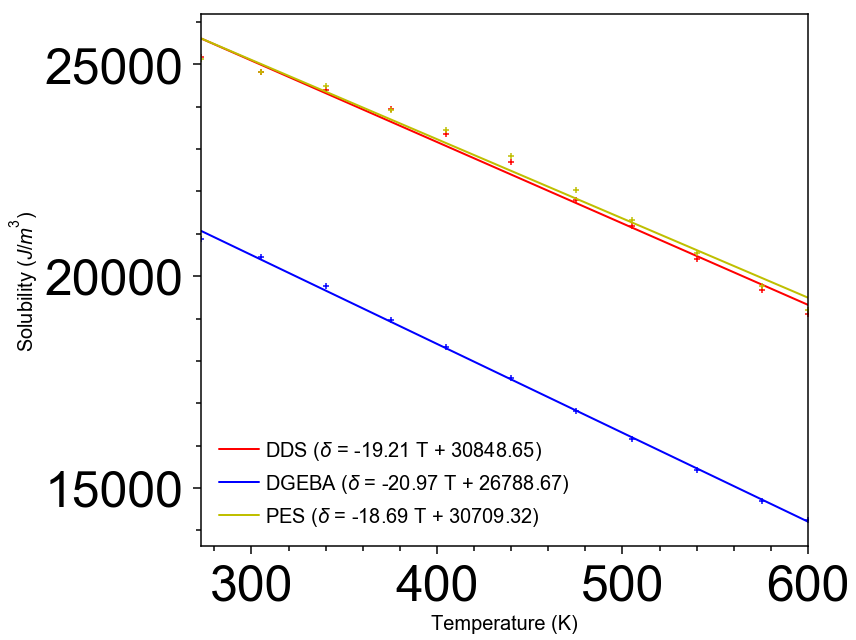

In [358]:
plt.figure(0,figsize=(12,9))
df_grouped = df[df.name != 'PES10'].groupby('name')
colors={'DDS':'r','DGEBA':'b','PES10':'g','PES1':'y'}
solubility_eqs={}
for key, group in df_grouped:
    group.groupby('kT')['solubility_SI'].sum().plot(marker='+',linestyle='',color=colors[key],label='')
    x = np.array(list(group.groupby('kT')['kT'].sum()))
    y = np.array(list(group.groupby('kT')['solubility_SI'].sum()))
    # fit with np.polyfit
    m, b = np.polyfit(x, y, 1)
    solubility_eqs[key]=(m,b)
    if key == 'PES1':
        name='PES'
    else:
        name=key
    plt.plot(x, m*x + b, '-',color=colors[key],label='{} ($\delta$ = {} T + {})'.format(name,round(m,2),round(b,2)))
    #print(group.groupby('kT')['solubility'].__dir__())
plt.legend(fontsize=20)
plt.minorticks_on()
plt.ylabel('Solubility ($J/m^3$)')
plt.xlabel('Temperature (K)')
print(solubility_eqs)
plt.savefig('solubility_fitting.png')


-0.000685129177388 [273 305 340 375 405 440 475 505 540 575 600] 1.52283902857
-0.000811726026573 [273 305 340 375 405 440 475 505 540 575 600] 1.3702792624
-0.000663138175416 [273 305 340 375 405 440 475 505 540 575 600] 1.49135880016
{'DDS': (-0.00068512917738756225, 1.5228390285740077), 'DGEBA': (-0.00081172602657277341, 1.3702792624023832), 'PES1': (-0.00066313817541642213, 1.4913588001625055)}


/Users/stephenthomas/miniconda3/envs/dybond/lib/python3.5/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


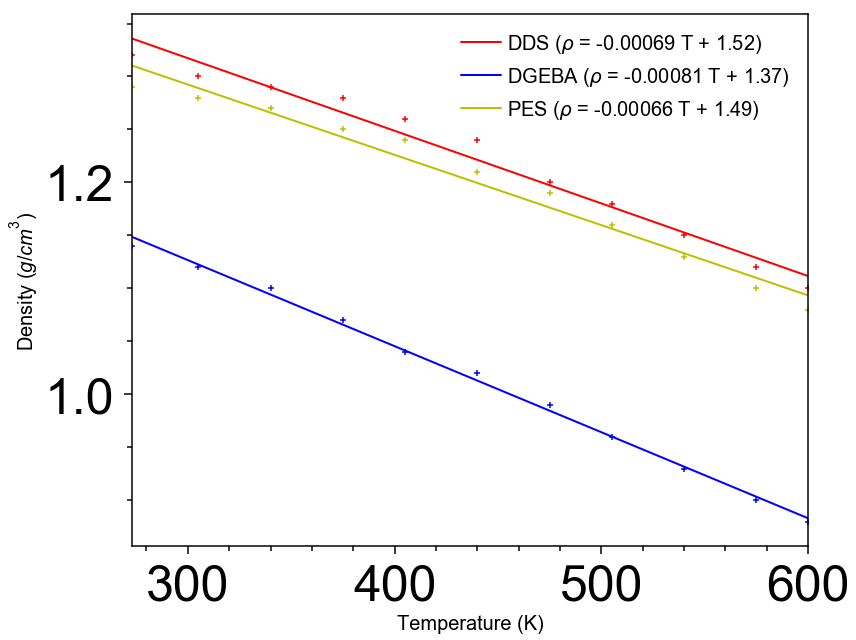

In [361]:
plt.figure(0,figsize=(12,9))
df_grouped = df[df.name != 'PES10'].groupby('name')
colors={'DDS':'r','DGEBA':'b','PES10':'g','PES1':'y'}
density_eqs={}
for key, group in df_grouped:
    group.groupby('kT')['rho'].sum().plot(marker='+',linestyle='',color=colors[key],label='')
    x = np.array(list(group.groupby('kT')['kT'].sum()))
    y = np.array(list(group.groupby('kT')['rho'].sum()))
    # fit with np.polyfit
    m, b = np.polyfit(x, y, 1)
    density_eqs[key]=(m,b)
    if key == 'PES1':
        name='PES'
    else:
        name=key
    plt.plot(x, m*x + b, '-',color=colors[key],label='{} ($\\rho$ = {} T + {})'.format(name,round(m,5),round(b,2)))
    print(m,x,b)
    #print(group.groupby('kT')['solubility'].__dir__())
plt.legend(fontsize=20)
plt.minorticks_on()
plt.ylabel('Density ($g/cm^3$)')
plt.xlabel('Temperature (K)')
#plt.savefig('density_fitting.png')
print(density_eqs)

In [339]:
Ts = [273,305,340,375,405,440,475,505,540,575,600]
kai_kT = {}

for T in Ts:
    kai_dict = {}
    kai_dict['kai(DDS_DEGBF)'] = kai(df,0,1,T)
    kai_dict['kai(DDS_PES10)']   = kai(df,0,3,T)
    kai_dict['kai(DEGBF_PES10)']   = kai(df,1,3,T)
    kai_dict['kai(DDS_PES1)']   = kai(df,0,2,T)
    kai_dict['kai(DEGBF_PES1)']   = kai(df,1,2,T)
    kai_dict['T'] = T
    kai_kT['{} kT'.format(T)] = kai_dict

    
df_kai = pd.DataFrame.from_dict(kai_kT,orient="index")
df_kai['delta_a(DDS_DEGBF)'] = df_kai['kai(DDS_DEGBF)']/0.286
df_kai['delta_a(DDS_PES10)'] = df_kai['kai(DDS_PES10)']/0.286
df_kai['delta_a(DEGBF_PES10)'] = df_kai['kai(DEGBF_PES10)']/0.286
#df_kai['delta_a(DDS_PES1)'] = df_kai['kai(DDS_PES1)']/0.286
#df_kai['delta_a(DEGBF_PES1)'] = df_kai['kai(DEGBF_PES1)']/0.286
df_kai['delta_a(DDS_PES1)'] = df_kai['kai(DDS_PES1)']/0.306
df_kai['delta_a(DEGBF_PES1)'] = df_kai['kai(DEGBF_PES1)']/0.306

aii=25.0
df_kai['a(DDS_DEGBF)'] = aii + df_kai['delta_a(DDS_DEGBF)']
df_kai['a(DDS_PES10)'] = aii + df_kai['delta_a(DDS_PES10)']
df_kai['a(DEGBF_PES10)'] = aii + df_kai['delta_a(DEGBF_PES10)']
df_kai['a(DDS_PES1)'] = aii + df_kai['delta_a(DDS_PES1)']
df_kai['a(DEGBF_PES1)'] = aii + df_kai['delta_a(DEGBF_PES1)']

print('Kai parameters')
df_kai


Kai parameters


kai(DDS_DEGBF)  kai(DEGBF_PES10)    T  kai(DEGBF_PES1)  kai(DDS_PES1)  \
273 kT        1.827830          0.064186  273         1.785844       0.000244   
305 kT        1.720524          0.030377  305         1.726359       0.000005   
340 kT        1.755866          0.000024  340         1.816490       0.000514   
375 kT        1.870832          0.023331  375         1.844400       0.000094   
405 kT        1.810415          0.076565  405         1.873267       0.000536   
440 kT        1.732308          0.122558  440         1.829345       0.001322   
475 kT        1.574369          0.264629  475         1.723086       0.003355   
505 kT        1.544301          0.374707  505         1.631847       0.001207   
540 kT        1.461178          0.513041  540         1.544255       0.001148   
575 kT        1.409598          0.688121  575         1.468852       0.000610   
600 kT        1.316618          0.728138  600         1.377980       0.000699   

        kai(DDS_PES10)  delta_a(DDS_DEGBF)  delta_a(DDS_PES10)  \
273 kT        2.577061            6.391013            9.010702   
305 kT        2.208125            6.015819            7.720717   
340 kT        1.742879            6.139390            6.093982   
375 kT        1.476322            6.541369            5.161965   
405 kT        1.142359            6.330122            3.994264   
440 kT        0.933329            6.057022            3.263387   
475 kT        0.548070            5.504785            1.916330   
505 kT        0.397613            5.399654            1.390256   
540 kT        0.242579            5.109012            0.848178   
575 kT        0.127974            4.928666            0.447462   
600 kT        0.086512            4.603559            0.302491   

        delta_a(DEGBF_PES10)  delta_a(DDS_PES1)  delta_a(DEGBF_PES1)  \
273 kT              0.224428           0.000797             5.836090   
305 kT              0.106212           0.000016             5.641697   
340 kT              0.000084           0.001681             5.936242   
375 kT              0.081576           0.000307             6.027451   
405 kT              0.267711           0.001752             6.121789   
440 kT              0.428523           0.004321             5.978252   
475 kT              0.925275           0.010965             5.631000   
505 kT              1.310165           0.003944             5.332832   
540 kT              1.793849           0.003753             5.046586   
575 kT              2.406016           0.001993             4.800169   
600 kT              2.545937           0.002284             4.503204   

        a(DDS_DEGBF)  a(DDS_PES10)  a(DEGBF_PES10)  a(DDS_PES1)  a(DEGBF_PES1)  
273 kT     31.391013     34.010702       25.224428    25.000797      30.836090  
305 kT     31.015819     32.720717       25.106212    25.000016      30.641697  
340 kT     31.139390     31.093982       25.000084    25.001681      30.936242  
375 kT     31.541369     30.161965       25.081576    25.000307      31.027451  
405 kT     31.330122     28.994264       25.267711    25.001752      31.121789  
440 kT     31.057022     28.263387       25.428523    25.004321      30.978252  
475 kT     30.504785     26.916330       25.925275    25.010965      30.631000  
505 kT     30.399654     26.390256       26.310165    25.003944      30.332832  
540 kT     30.109012     25.848178       26.793849    25.003753      30.046586  
575 kT     29.928666     25.447462       27.406016    25.001993      29.800169  
600 kT     29.603559     25.302491       27.545937    25.002284      29.503204

/Users/stephenthomas/miniconda3/envs/dybond/lib/python3.5/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


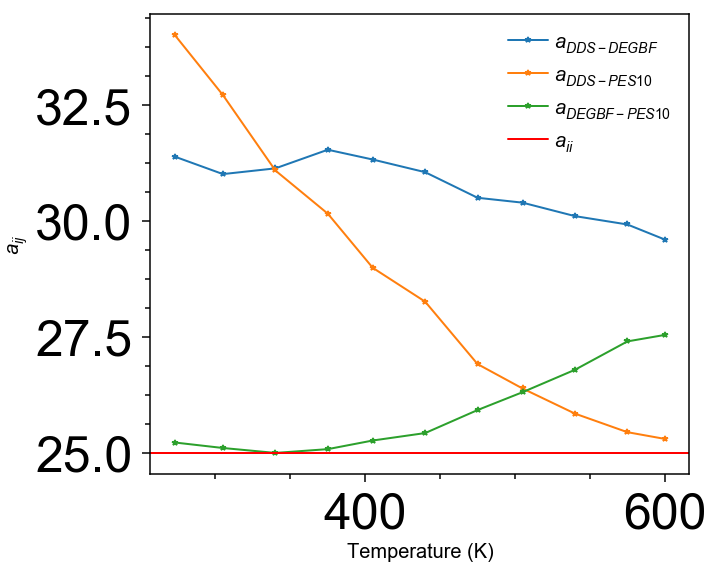

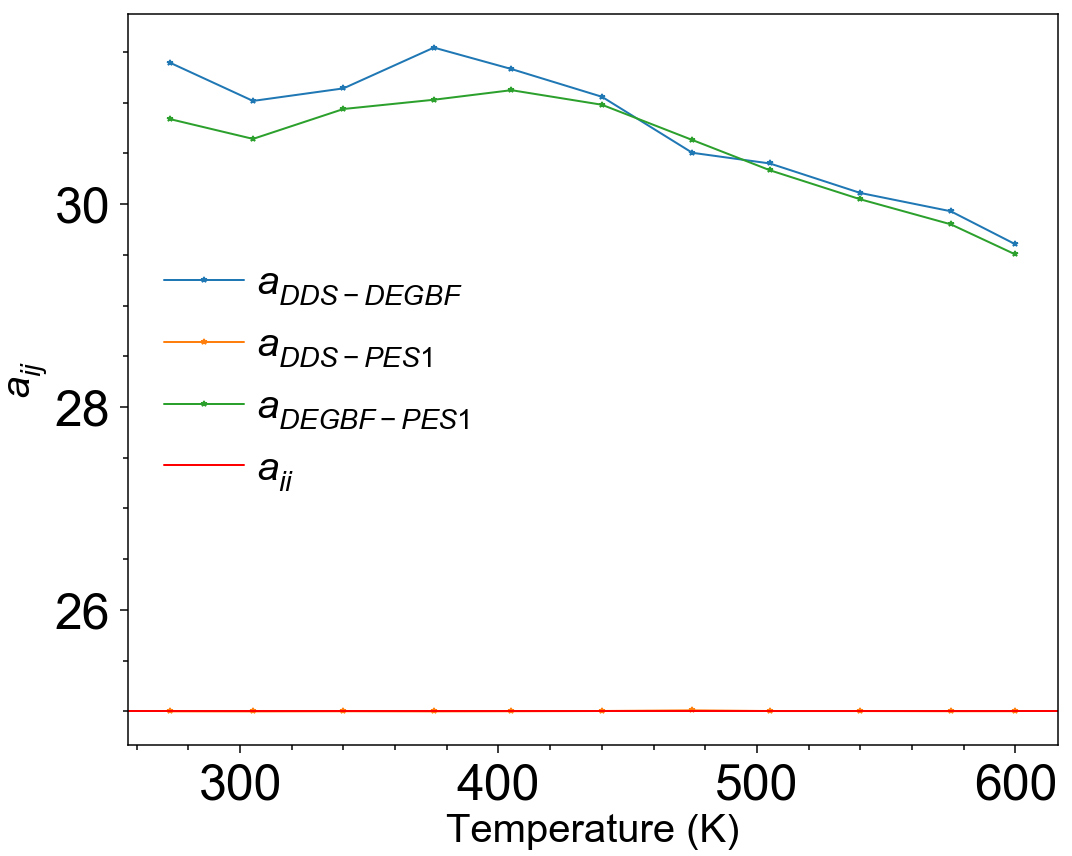

In [343]:
plt.figure(0,figsize=(10,8))

plt.plot(df_kai['T'],df_kai['a(DDS_DEGBF)'],label='$a_{DDS-DEGBF}$',marker='*')
plt.plot(df_kai['T'],df_kai['a(DDS_PES10)'],label='$a_{DDS-PES10}$',marker='*')
plt.plot(df_kai['T'],df_kai['a(DEGBF_PES10)'],label='$a_{DEGBF-PES10}$',marker='*')

plt.minorticks_on()
plt.xlabel('Temperature (K)')
plt.ylabel('$a_{ij}$')

plt.axhline(y=25.0, color='r', linestyle='-',label='$a_{ii}$')
plt.legend(fontsize=20)

plt.figure(1,figsize=(15,12))

plt.plot(df_kai['T'],df_kai['a(DDS_DEGBF)'],label='$a_{DDS-DEGBF}$',marker='*')
plt.plot(df_kai['T'],df_kai['a(DDS_PES1)'],label='$a_{DDS-PES1}$',marker='*')
plt.plot(df_kai['T'],df_kai['a(DEGBF_PES1)'],label='$a_{DEGBF-PES1}$',marker='*')
plt.minorticks_on()
plt.xlabel('Temperature (K)',fontsize=40)
plt.ylabel('$a_{ij}$',fontsize=40)

plt.axhline(y=25.0, color='r', linestyle='-',label='$a_{ii}$')
plt.legend(fontsize=40)

# Taking average $a_{ij}$ values over the range of 273 to 600 K

In [341]:
print('average a(DDS_DEGBF):',np.mean(df_kai['a(DDS_DEGBF)']))
print('average a(DDS_PES1):',np.mean(df_kai['a(DDS_PES1)']))
print('average a(DEGBF_PES1):',np.mean(df_kai['a(DEGBF_PES1)']))
print('average kT:',np.mean(df_kai['T']))
print(df_kai['T'])
#plt.plot(df_kai['T'],df_kai['a(DDS_DEGBF)'],label='$a_{DDS-DEGBF}$',marker='*')
#plt.plot(df_kai['T'],df_kai['a(DDS_PES1)'],label='$a_{DDS-PES1}$',marker='*')
#plt.plot(df_kai['T'],df_kai['a(DEGBF_PES1)'],label='$a_{DEGBF-PES1}$',marker='*')

average a(DDS_DEGBF): 30.7291283823
average a(DDS_PES1): 25.0028921457
average a(DEGBF_PES1): 30.5323011313
average kT: 439.363636364
273 kT    273
305 kT    305
340 kT    340
375 kT    375
405 kT    405
440 kT    440
475 kT    475
505 kT    505
540 kT    540
575 kT    575
600 kT    600
Name: T, dtype: int64


In [333]:
print(density_eqs)

{'DDS': (-0.00068512917738756225, 1.5228390285740077), 'DGEBA': (-0.00081172602657277341, 1.3702792624023832), 'PES10': (-0.00029849230352548104, 1.3856921184489679), 'PES1': (-0.00066313817541642213, 1.4913588001625055)}


{'DDS': (-0.00068512917738756225, 1.5228390285740077), 'DGEBA': (-0.00081172602657277341, 1.3702792624023832), 'PES10': (-0.00029849230352548104, 1.3856921184489679), 'PES1': (-0.00066313817541642213, 1.4913588001625055)}


/Users/stephenthomas/miniconda3/envs/dybond/lib/python3.5/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


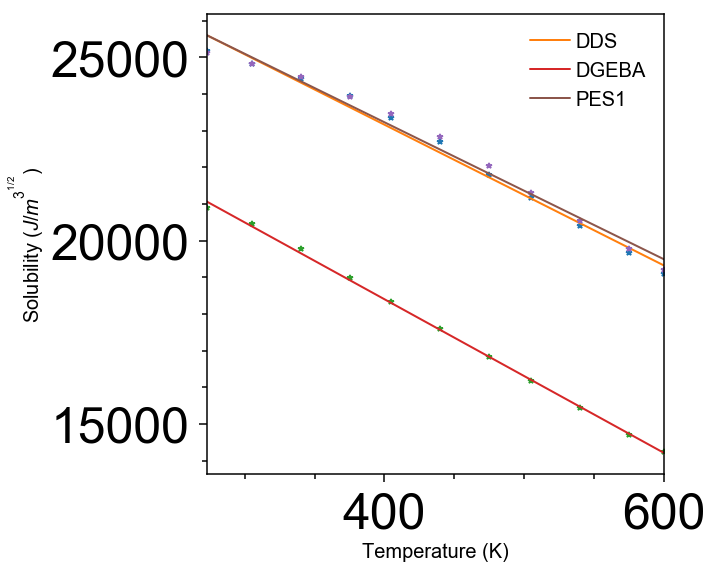

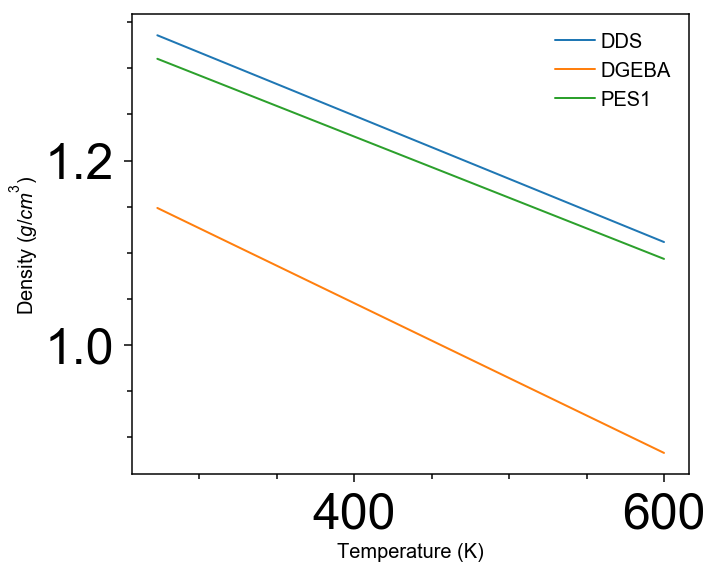

In [356]:
plt.figure(0,figsize=(10,8))
Ts =np.linspace(273,600)

df_grouped = df[df.name != 'PES10'].groupby('name')
for key, group in df_grouped:
    name=key
    group.groupby('kT')['solubility_SI'].mean().plot(linestyle='',marker='*',label='')
    
    delta_i_SI = solubility_eqs[name][0]*Ts + solubility_eqs[name][1]
    plt.plot(Ts, delta_i_SI, '-',label=name)
    
plt.legend(fontsize=20)
plt.minorticks_on()
plt.ylabel('Solubility ($J/m^{3^{1/2}}$)')
plt.xlabel('Temperature (K)')

print(density_eqs)
plt.figure(1,figsize=(10,8))
for name in density_eqs:
    if name != 'PES10':
        sol = density_eqs[name][0]*Ts + density_eqs[name][1]
        plt.plot(Ts, sol, '-',label=name)
plt.legend(fontsize=20)
plt.minorticks_on()
plt.ylabel('Density ($g/cm^3$)')
plt.xlabel('Temperature (K)')


In [345]:
Ts = [273,305,340,375,405,440,475,505,540,575,600]
Ts = np.linspace(273,600)
kai_kT = {}

for T in Ts:
    kai_dict = {}
    kai_dict['kai(DDS_DEGBF)'] = kai_analytical(solubility_eqs,density_eqs,'DDS','DGEBA',T)
    kai_dict['kai(DDS_PES10)']   = kai_analytical(solubility_eqs,density_eqs,'DDS','PES10',T)
    kai_dict['kai(DEGBF_PES10)']   = kai_analytical(solubility_eqs,density_eqs,'DGEBA','PES10',T)
    kai_dict['kai(DDS_PES1)']   = kai_analytical(solubility_eqs,density_eqs,'DDS','PES1',T)
    kai_dict['kai(DEGBF_PES1)']   = kai_analytical(solubility_eqs,density_eqs,'DGEBA','PES1',T)
    kai_dict['T'] = T
    kai_kT['{} kT'.format(T)] = kai_dict

    
df_kai_a = pd.DataFrame.from_dict(kai_kT,orient="index")
df_kai_a['delta_a(DDS_DEGBF)']   = df_kai_a['kai(DDS_DEGBF)']/0.286
df_kai_a['delta_a(DDS_PES10)']   = df_kai_a['kai(DDS_PES10)']/0.286
df_kai_a['delta_a(DEGBF_PES10)'] = df_kai_a['kai(DEGBF_PES10)']/0.286
df_kai_a['delta_a(DDS_PES1)']    = df_kai_a['kai(DDS_PES1)']/0.286
df_kai_a['delta_a(DEGBF_PES1)']  = df_kai_a['kai(DEGBF_PES1)']/0.286

aii=25.0
df_kai_a['a(DDS_DEGBF)']   = aii + df_kai_a['delta_a(DDS_DEGBF)']
df_kai_a['a(DDS_PES10)']   = aii + df_kai_a['delta_a(DDS_PES10)']
df_kai_a['a(DEGBF_PES10)'] = aii + df_kai_a['delta_a(DEGBF_PES10)']
df_kai_a['a(DDS_PES1)']    = aii + df_kai_a['delta_a(DDS_PES1)']
df_kai_a['a(DEGBF_PES1)']  = aii + df_kai_a['delta_a(DEGBF_PES1)']

print('Kai parameters')
df_kai_a.head()

Kai parameters


kai(DDS_DEGBF)  kai(DEGBF_PES10)           T  \
273.0 kT                    2.139739          0.080622  273.000000   
279.6734693877551 kT        2.108825          0.063229  279.673469   
286.3469387755102 kT        2.079556          0.048259  286.346939   
293.0204081632653 kT        2.051820          0.035562  293.020408   
299.6938775510204 kT        2.025520          0.025000  299.693878   

                      kai(DEGBF_PES1)  kai(DDS_PES1)  kai(DDS_PES10)  \
273.0 kT                     2.030119   1.215864e-07        2.917121   
279.6734693877551 kT         2.002707   1.992078e-06        2.769604   
286.3469387755102 kT         1.976777   6.019084e-06        2.629798   
293.0204081632653 kT         1.952229   1.208108e-05        2.497186   
299.6938775510204 kT         1.928975   2.006775e-05        2.371293   

                      delta_a(DDS_DEGBF)  delta_a(DDS_PES10)  \
273.0 kT                        7.481605           10.199723   
279.6734693877551 kT            7.373515            9.683929   
286.3469387755102 kT            7.271173            9.195099   
293.0204081632653 kT            7.174197            8.731419   
299.6938775510204 kT            7.082237            8.291233   

                      delta_a(DEGBF_PES10)  delta_a(DDS_PES1)  \
273.0 kT                          0.281897       4.251273e-07   
279.6734693877551 kT              0.221081       6.965307e-06   
286.3469387755102 kT              0.168739       2.104575e-05   
293.0204081632653 kT              0.124343       4.224153e-05   
299.6938775510204 kT              0.087413       7.016696e-05   

                      delta_a(DEGBF_PES1)  a(DDS_DEGBF)  a(DDS_PES10)  \
273.0 kT                         7.098320     32.481605     35.199723   
279.6734693877551 kT             7.002473     32.373515     34.683929   
286.3469387755102 kT             6.911807     32.271173     34.195099   
293.0204081632653 kT             6.825976     32.174197     33.731419   
299.6938775510204 kT             6.744667     32.082237     33.291233   

                      a(DEGBF_PES10)  a(DDS_PES1)  a(DEGBF_PES1)  
273.0 kT                   25.281897    25.000000      32.098320  
279.6734693877551 kT       25.221081    25.000007      32.002473  
286.3469387755102 kT       25.168739    25.000021      31.911807  
293.0204081632653 kT       25.124343    25.000042      31.825976  
299.6938775510204 kT       25.087413    25.000070      31.744667

/Users/stephenthomas/miniconda3/envs/dybond/lib/python3.5/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


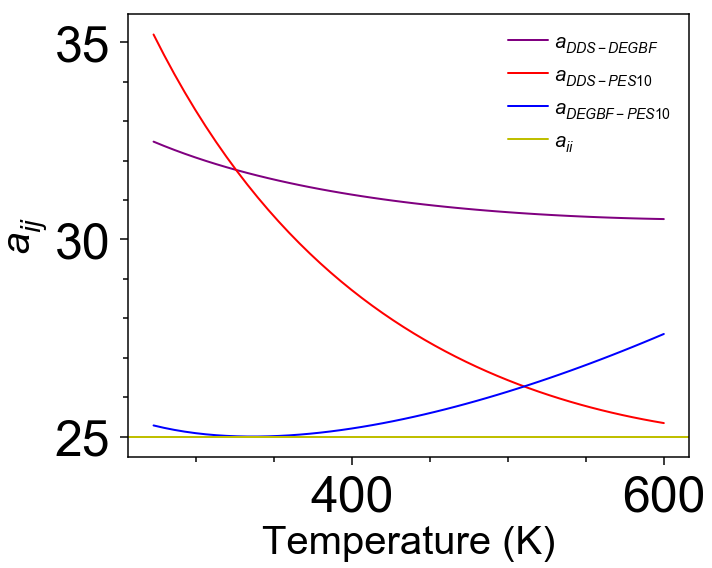

In [346]:
plt.figure(0,figsize=(10,8))
df_kai_a = df_kai_a.sort_values('T')
plt.plot(df_kai_a['T'],df_kai_a['a(DDS_DEGBF)'],label='$a_{DDS-DEGBF}$'    ,color='purple')
plt.plot(df_kai_a['T'],df_kai_a['a(DDS_PES10)'],label='$a_{DDS-PES10}$'    ,color=colors['DDS'])
plt.plot(df_kai_a['T'],df_kai_a['a(DEGBF_PES10)'],label='$a_{DEGBF-PES10}$',color=colors['DGEBA'])

plt.axhline(y=25.0, color='y', linestyle='-',label='$a_{ii}$')
plt.legend(fontsize=20,loc='upper right')

#plt.scatter(df_kai['T'],df_kai['a(DDS_DEGBF)']  ,marker='+',color='purple')#,label='$a_{DDS-DEGBF}$'  
#plt.scatter(df_kai['T'],df_kai['a(DDS_PES10)']  ,marker='+',color=colors['DDS'])#,label='$a_{DDS-PES10}$'  
#plt.scatter(df_kai['T'],df_kai['a(DEGBF_PES10)'],marker='+',color=colors['DGEBA'])#,label='$a_{DEGBF-PES10}$'


plt.minorticks_on()
plt.xlabel('Temperature (K)',fontsize=40)
plt.ylabel('$a_{ij}$',fontsize=40)


/Users/stephenthomas/miniconda3/envs/dybond/lib/python3.5/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


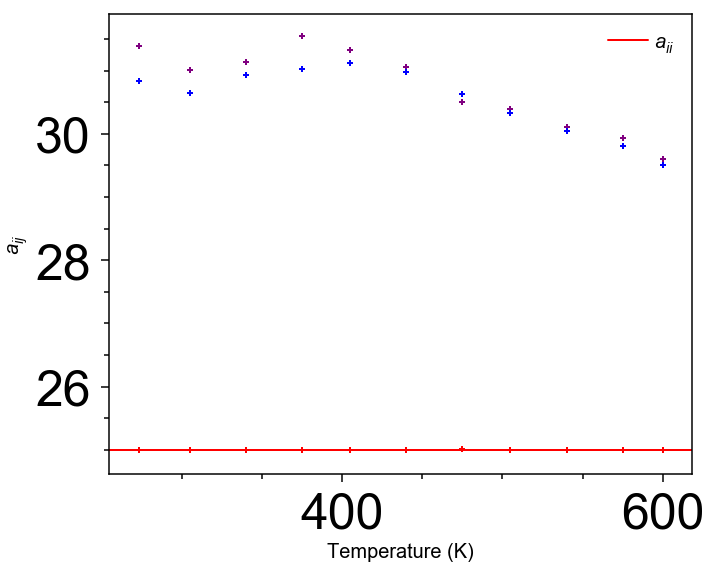

In [353]:
plt.figure(1,figsize=(10,8))

#plt.plot(df_kai_a['T'],df_kai_a['a(DDS_DEGBF)'],label='$a_{DDS-DEGBF}$',color='purple')
#plt.plot(df_kai_a['T'],df_kai_a['a(DDS_PES1)'],label='$a_{DDS-PES1}$',color=colors['DDS'])
#plt.plot(df_kai_a['T'],df_kai_a['a(DEGBF_PES1)'],label='$a_{DEGBF-PES1}$',color=colors['DGEBA'])
plt.minorticks_on()
plt.xlabel('Temperature (K)')
plt.ylabel('$a_{ij}$')
plt.axhline(y=25.0, color='r', linestyle='-',label='$a_{ii}$')
plt.legend(fontsize=20)
plt.scatter(df_kai['T'],df_kai['a(DDS_DEGBF)']  ,marker='+',color='purple')#,label='$a_{DDS-DEGBF}$'  
plt.scatter(df_kai['T'],df_kai['a(DDS_PES1)']  ,marker='+',color=colors['DDS'])#,label='$a_{DDS-PES10}$'  
plt.scatter(df_kai['T'],df_kai['a(DEGBF_PES1)'],marker='+',color=colors['DGEBA'])#,label='$a_{DEGBF-PES10}$'





# Use the cell below to obtain $a_{ij}$ values for simulation

a parameters
 [[1663.2764, 200, [34.19779242957803, 43.352196537139221, 26.718784662130702]], [3534.46235, 425, [30.992347705011429, 27.991100453112981, 25.377932446837878]], [4989.8292, 600, [30.517388631460463, 25.341843153666201, 27.602300125316489]], [7068.9247, 850, [30.825940615601048, 25.46897794911796, 33.086915420343104]], [8316.382, 1000, [31.476823544340707, 26.876288129561736, 37.687952672176145]]]
Energy scales [1663.2764, 3534.46235, 4989.8292, 7068.9247, 8316.382]


/Users/stephenthomas/miniconda3/envs/dybond/lib/python3.5/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


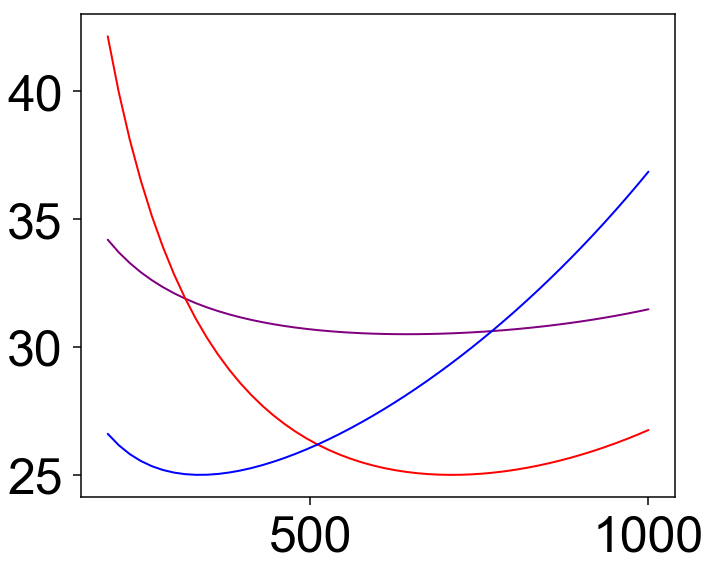

In [308]:
def get_a(thisdf,T,a_field):
    max_T = np.max(thisdf['T'])
    min_T = np.min(thisdf['T'])
    max_a = thisdf.loc[thisdf['T'] == max_T, a_field].iloc[0]
    min_a = thisdf.loc[thisdf['T'] == min_T, a_field].iloc[0]
    x=[min_T,max_T]
    y=[min_a,max_a]
    return np.interp(T, x, y)

def get_DPD_parameters(T_for_E_scale):
    a_AB = get_a(df_kai_a,T_for_E_scale,'a(DDS_DEGBF)')#np.mean(df_kai['a(DDS_DEGBF)'])
    a_AC = get_a(df_kai_a,T_for_E_scale,'a(DDS_PES10)')
    a_BC = get_a(df_kai_a,T_for_E_scale,'a(DEGBF_PES10)')
    #print('a_AB',round(a_AB,3))
    #print('a_AC',round(a_AC,3))
    #print('a_BC',round(a_BC,3))
    E_scale = kB*T_for_E_scale*Na
    #print('E',E_scale,'J/mol')
    Ts = np.asarray([200,425,600,850])
    T_stars = (kB*Ts*Na)/E_scale
    #print('T(K)',Ts)
    #print('kT',T_stars)
    return a_AB,a_AC,a_BC,E_scale

T_for_E_scales = [200,425,600,850,1000]#[273,305,340,375,405,440,475,505,540,575,600]#[273,425,600]
a_s = []
Es = []
plt.figure(figsize=(10,8))
Ts = []
a1s=[]
a2s=[]
a3s=[]
for T_for_E_scale in T_for_E_scales:
    a1=aij(T_for_E_scale,'DDS','DGEBA')
    a2=aij(T_for_E_scale,'DDS','PES10')
    a3=aij(T_for_E_scale,'DGEBA','PES10')
    E_scale = kB*T_for_E_scale*Na
    #a1,a2,a3,E_scale = get_DPD_parameters(T_for_E_scale)
    a_s.append([E_scale,T_for_E_scale,[a1,a2,a3]])
    Ts.append(T_for_E_scale)
    a1s.append(a1)
    a2s.append(a2)
    a3s.append(a3)
    Es.append(E_scale)
print('a parameters\n',a_s)
print('Energy scales',Es)
#plt.plot(Ts,a1s,marker='o')
#plt.plot(Ts,a2s,marker='o')
#plt.plot(Ts,a3s,marker='o')

df_kai_a = df_kai_a.sort_values('T')
plt.plot(df_kai_a['T'],df_kai_a['a(DDS_DEGBF)'],label='$a_{DDS-DEGBF}$'    ,color='purple')
plt.plot(df_kai_a['T'],df_kai_a['a(DDS_PES10)'],label='$a_{DDS-PES10}$'    ,color=colors['DDS'])
plt.plot(df_kai_a['T'],df_kai_a['a(DEGBF_PES10)'],label='$a_{DEGBF-PES10}$',color=colors['DGEBA'])

## Defining energy unit $E$ @ 273 K 

$1 E = 1 k_BT = 2.27 kJ/mol$

In [350]:
T=439.36 #K
energy_unit = kB*T*Na
E = energy_unit*1e-3
print('E',E,'kJ/mol')
print('E',E*0.239,'kcal/mol')

E 3.6538855955200003 kJ/mol
E 0.87327865732928 kcal/mol


## Deriving mass unit $M$ and distance unit $D$

$\overline M=M_A*\phi_A+M_B*\phi_B+M_C*\phi_C = 0.265 kg/mol$

$\overline \rho=\rho_A*\phi_A+\rho_B*\phi_B+\rho_C*\phi_C = 1.236 g/cm^3$

$\overline V = \frac{\overline M}{\overline \rho} = 356.22 A^3$

$D = (\overline V\rho_n)^{1/3}$ = 1.022e-9 m, where $\rho_n = 3$

volume 402.030641415 A^3
rho 1.15163847678 g/cm^3
L 10.6445376685 A
M 278.81496000000004 g/mol
L 1.06445376685e-09 m


/Users/stephenthomas/miniconda3/envs/dybond/lib/python3.5/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


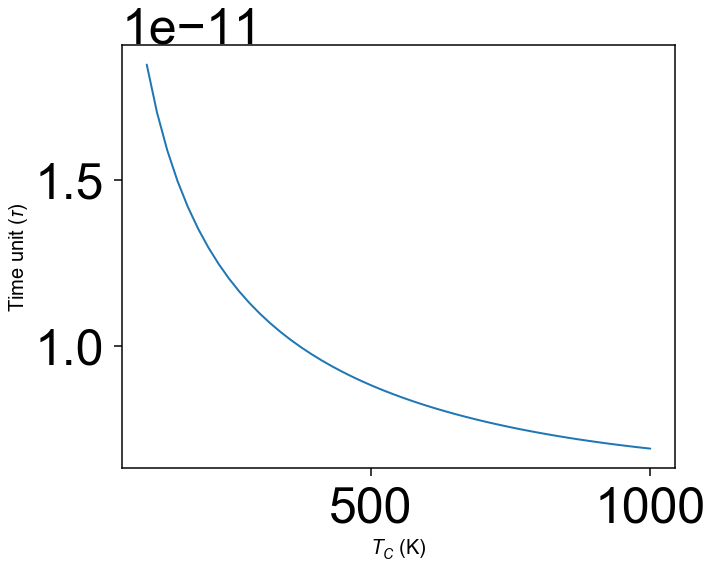

In [351]:
av_vol,av_rho,av_M = getBeadVolDensityAndMass_analytical(density_eqs,'DDS','PES10',T)#here it is important to pass 'PES10

rho_n = 3 #standard reduced density used in DPD
L = (av_vol*rho_n)**(1/3)
print('volume',av_vol,'A^3')
print('rho',av_rho,'g/cm^3')

print("L",L,'A')
L = L*1e-10
M = av_M*1e-3
print('M',M*1e3,'g/mol')
print("L",L,'m')
#print('tau',tau,'seconds')
#print('curing time',tau*(time_steps*dt)/60,'minutes')

def get_distance_and_mass_unit(T):
    av_vol,av_rho,av_M = getBeadVolDensityAndMass_analytical(density_eqs,'DDS','PES10',T)#here it is important to pass 'PES10

    rho_n = 3 #standard reduced density used in DPD
    L = (av_vol*rho_n)**(1/3)
    #print('volume',av_vol,'A^3')
    #print('rho',av_rho,'g/cm^3')

    #print("L",L,'A')
    L = L*1e-10
    M = av_M*1e-3
    return L,M
Ts=np.linspace(100,1000)
Ds = []
Ms = []
Es = []
Taus = []
for T in Ts:
    this_D,this_M = get_distance_and_mass_unit(T)
    this_E = kB*T*Na
    this_time_unit = math.sqrt(this_M*this_D**2/this_E)
    Ds.append(this_D)
    Taus.append(this_time_unit)
    Es.append(this_E)
plt.figure(0,figsize=(10,8))
plt.plot(Ts,Taus,label='$\\tau$')
#plt.plot(Ts,Es)
#plt.plot(Ts,Ds,label='D')
plt.xlabel('$T_{C}$ (K)')
plt.ylabel('Time unit ($\\tau$)')

## Now we can use the known values of $E, M$ and $D$ to derive $\tau$ using

$\tau = \sqrt{\frac{MD^2}{E}}$

In [352]:
time_unit = math.sqrt(M*L**2/energy_unit)
print('tau',time_unit,'s')

time_steps = 745000 # from @1 kT  A=2.0 and Ea=1.0
dt = 0.01
print('curing time @1 kT  A=2.0 and Ea=1.0',time_unit*(time_steps*dt)/60,'minutes')

F=energy_unit/Na/L
print('Force',F,'N')

tau 9.298381628342344e-12 s
curing time @1 kT  A=2.0 and Ea=1.0 1.1545490521858411e-09 minutes
Force 5.70016452472e-12 N


## Thus, @ 273 K

## 1 $E$ = 2.27 kJ/mol
## 1 $M$ = 0.265 kg/mol
## 1 $D$ = 1.022e-9 m
## 1 $\tau$ = 1.11e-11 sec
## 1 $T^*$ = 273 K

# ----------End of document----------

In [312]:
#Data from DGEBF-273.pdf
E_coh = 31.23*1e3 #cal/mol
molecular_weight = 304.423 #amu
num_molecules = 500
density = 1.14 #g/cm^3
delta_Hv = 31.77*1e3 #cal/mol
T=273 #K
R = 8.314*1e3*2.39e-4 #cal/mol.K

#Calculating molar volume
Na = 6.022e23
cal_cm_cubed_to_MPa = 4.187
total_m_weight = molecular_weight*num_molecules*1.660468e-24 #amu to g
v=total_m_weight/density #cm^3 (for 500 molecules)
#Vm=v*Na/num_molecules #cm^3/mol
Vm=248901.03e-24*Na/num_molecules #cm^3

#Calculating solubility using Cohesive energy
e_coh = (E_coh/Vm)*cal_cm_cubed_to_MPa #cal/cm^3 to MPa
solubility_DEGBF = (e_coh)**(1/2)#MPa^(1/2)
print('solubility:',round(solubility_DEGBF,2),'MPa^(1/2)')

#Calculating solubility using Heat of vaporization
#solubility = (((delta_Hv-(R*T))/Vm)*cal_cm_cubed_to_MPa)**(1/2)#cal/cm^3 to MPa
#print('solubility:',round(solubility,2),'MPa^(1/2)')

solubility: 20.89 MPa^(1/2)


In [313]:
2/math.sqrt(2) -1

0.4142135623730949

In [314]:
0.071*0.414

0.029393999999999997

In [315]:
(1.2-0.8)/0.8

0.4999999999999999

In [316]:
0.8*1.6

1.2800000000000002

In [317]:
xa=1.6/3
print(xa)
print((1-xa)/xa)
kai_val = math.log((1-xa)/xa)/(1-2*xa)
print(xa)

0.5333333333333333
0.875
0.5333333333333333


In [318]:
N=6
kai_val = 4
T=425
delta_a = kai_val*N/(0.306*N)
print(delta_a)

13.071895424836603


In [319]:
1/.306

3.2679738562091503

In [320]:
1/.286

3.4965034965034967

# Using average aij
### /home/sthomas/projects/av_aij_no_bonding (done)
* PES1 average aij using average calibrationT
* A 0.1
* no_bonding for RDF comparison: 5jobs
* bonding, 3 profiles :15 jobs

### /home/sthomas/projects/av_aij_A_0_4 (queued)
* PES1 average aij using average calibrationT
* A 0.4
* no_bonding for RDF comparison: 5jobs
* bonding, 3 profiles :15 jobs

### /home/sthomas/projects/av_aij_A_2_0 (queued)
* PES1 average aij using average calibrationT
* A 2.0
* no_bonding for RDF comparison: 5jobs
* bonding, 3 profiles :15 jobs

### /home/sthomas/projects/av_aij_A_10 (queued)
* PES1 average aij using average calibrationT
* A 10.0
* no_bonding for RDF comparison: 5jobs
* bonding, 3 profiles :15 jobs

### /home/sthomas/projects/av_aij_A_0_4_Ea_2 (queued)
* PES1 average aij using average calibrationT
* A 0.4
* Ea: 2
* no_bonding for RDF comparison: 5jobs
* bonding, 3 profiles :15 jobs

### /home/sthomas/projects/av_aij_A_0_4_Large (queued)
* PES1 average aij using average calibrationT
* A 0.4
* nmul: 10000
* no_bonding for RDF comparison: 5jobs
* bonding, 3 profiles :15 jobs

# ----------------------------------

# Using PES1
### /home/sthomas/projects/aij_PES1_bo_bonding (done)
* PES1 calculated aij using calibrationTs 200, 425, 600, 850, 1000 K
* A 0.1
* no_bonding for RDF comparison: 25jobs
* bonding, 3 profiles :75 jobs

### /home/sthomas/projects/aij_PES1_A_0_4 (queued)
* PES1 calculated aij using calibrationTs 200, 425, 600, 850, 1000 K
* A 0.4
* no_bonding for RDF comparison: 25jobs
* bonding, 3 profiles :75 jobs

# ----------------------------------

# Using PES10
### /home/sthomas/projects/aij_PES10 (queued)
* PES10 calculated aij using calibrationTs 200, 425, 600, 850, 1000 K
* A_0.1
* no_bonding for RDF comparison: 25jobs
* bonding, 3 profiles :75 jobs
# ----------------------------------

# Using PES10 and calibrationT of 425 K
### /home/sthomas/projects/fixed_aij_A_0_1
* PES10 calculated aij for calibrationT 425 K
* A 0.1
* bonding, 3 profiles for 5 temperatures :75 jobs
### /home/sthomas/projects/fixed_aij_A_0_4
* PES10 calculated aij for calibrationT 425 K
* A 0.4
* bonding, 3 profiles for 5 temperatures :75 jobs
### /home/sthomas/projects/fixed_aij_no_bonding
* PES10 calculated aij for calibrationT 425 K
* no bonding for RDF comparison: 25jobs
# ----------------------------------

In [321]:
np.asarray([200,425,600,850,1000])/425.0

array([ 0.47058824,  1.        ,  1.41176471,  2.        ,  2.35294118])

In [391]:
2e6*.2

400000.0